<a href="https://colab.research.google.com/github/Anchayadav/AutoTS/blob/main/Machine_Learning_Project_WalkThrounghj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


data_train  = pd.read_csv("train.csv")
data_test  =pd.read_csv("test.csv")

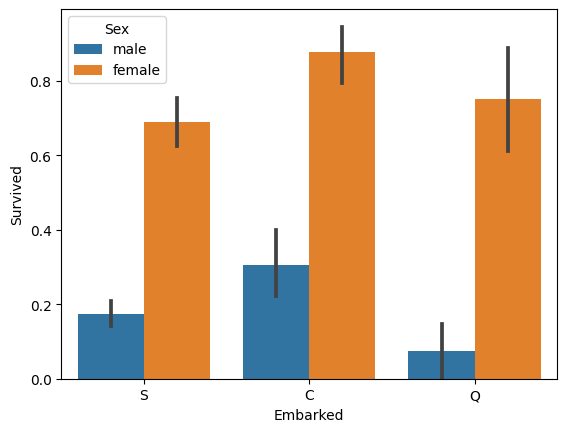

In [ ]:
sns.barplot(x='Embarked',y='Survived',hue='Sex',data = data_train)
plt.show()

In [ ]:
def simplify_ages(df):
  df.Age=df.Age.fillna(-0.5)
  bins=(-1,0,5,12,18,25,35,60,120)
  group_names=['Unknown','Baby','Child','Teenager','Student','Young Adult','Adult','Senior']
  categories = pd.cut(df.Age,bins,labels=group_names)
  df.Age = categories
  return df

def simplify_cabins(df):
  df.Cabin = df.Cabin.fillna('N')
  df.Cabin = df.Cabin.apply(lambda x:x[0])
  return df

def simplify_fares(df):
  df.Fare = df.Fare.fillna(-0.5)
  bins=(-1,0,8,15,31,1000)
  group_names = ['Unknown','1_quartile','2_quartile','3_quartile','4_quartile']
  categories = pd.cut(df.Fare,bins,labels=group_names)
  df.Fare=categories
  return df

def format_name(df):
  df['Lname']=df.Name.apply(lambda x:x.split(' ')[0])
  df['NamePrefix']=df.Name.apply(lambda x:x.split(' ')[1])
  return df

def drop_features(df):
  return df.drop(['Ticket','Name','Embarked'],axis=1)


def transform_features(df):
  df=simplify_ages(df)
  df=simplify_cabins(df)
  df=simplify_fares(df)
  df=format_name(df)
  df=drop_features(df)
  return df


data_train = transform_features(data_train)
data_test =transform_features(data_test)



In [ ]:
from sklearn import preprocessing
def encode_features(df_train,df_test):
  features=['Fare','Cabin','Age','Sex','Lname','NamePrefix']
  df_combined = pd.concat([df_train[features], df_test[features]])

  for feature in features:
    le =preprocessing.LabelEncoder()
    le=le.fit(df_combined[feature])
    df_train[feature]=le.transform(df_train[feature])
    df_test[feature]=le.transform(df_test[feature])
    return df_train,df_test

data_train,data_test = encode_features(data_train,data_test)


In [ ]:
from  sklearn.model_selection import train_test_split
X_all=data_train.drop(['Survived','PassengerId'],axis=1)
y_all=data_train['Survived']
num_test = 0.20
X_train,X_test,y_train,y_test=train_test_split(X_all,y_all,test_size=num_test,random_state=23)

In [ ]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer,accuracy_score
from sklearn.model_selection import GridSearchCV

clf=RandomForestClassifier()

parameters={'n_estimators':[4,6,9],
           'max_features':['log1','sqrt','auto'],
           'criterion':['entropy','gini'],
           'max_depth':[2,3,5,10],
           'min_samples_split':[2,3,5],
           'min_samples_leaf':[1,5,8]
            }
acc_scorer = make_scorer(accuracy_score)
grid_obj = GridSearchCV(clf,parameters,scoring=acc_scorer)
grid_obj = grid_obj.fit(X_train,y_train)

clf=grid_obj.best_estimator_
clf.fit(X_train,y_train)


In [ ]:
prediction= clf.predict(X_test)
print(accuracy_score(y_test,prediction))

In [ ]:
!pip install pandas-profiling



In [ ]:
from pandas_profiling import ProfileReport
report=ProfileReport(data_train)
report.to_widgets()

ImportError: ignored